In [1]:
#Loading Library

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#load dataset
data=pd.read_csv(r"C:\Users\asus\Downloads\hypothyroid.csv")


In [13]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [14]:
pd.Categorical(data['on thyroxine'])

['f', 'f', 'f', 't', 'f', ..., 'f', 'f', 'f', 'f', 'f']
Length: 3772
Categories (2, object): ['f', 't']

In [15]:
# try to understand the features

In [16]:
data.shape

(3772, 30)

In [17]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [18]:
data.replace("?",np.nan,inplace=True);

In [19]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,NaN,f,NaN,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,NaN,f,NaN,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NaN,SVI,P


In [20]:
data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [21]:
missing_values = data.isnull().sum().sort_values(ascending=False)
per=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
pd.concat([missing_values,per],keys=['Total_Missing_Values','Percentage'],axis=1)



,Total_Missing_Values,Percentage
TBG,3772,1.000000
T3,769,0.203871
T4U,387,0.102598
FTI,385,0.102068
TSH,369,0.097826
TT4,231,0.061241
sex,150,0.039767
age,1,0.000265
query hypothyroid,0,0.000000
I131 treatment,0,0.000000


In [22]:
data=data.drop('TBG',axis=1)

In [23]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,NaN,f,NaN,f,other,P
2,46,M,f,f,f,f,f,f,f,f,...,NaN,t,109,t,0.91,t,120,f,other,P
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,NaN,f,NaN,f,other,P
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,P


In [24]:
data.shape

(3772, 29)

In [25]:
data.replace(['t','f'],['1','0'],inplace=True)

In [26]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,SVHC,P
1,23,F,0,0,0,0,0,0,0,0,...,2,1,102,0,NaN,0,NaN,0,other,P
2,46,M,0,0,0,0,0,0,0,0,...,NaN,1,109,1,0.91,1,120,0,other,P
3,70,F,1,0,0,0,0,0,0,0,...,1.9,1,175,0,NaN,0,NaN,0,other,P
4,70,F,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,SVI,P


In [27]:
data.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
referral source             

In [28]:
missing_values = data.isnull().sum().sort_values(ascending=False)
per=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
pd.concat([missing_values,per],keys=['Total_Missing_Values','Percentage'],axis=1)



,Total_Missing_Values,Percentage
T3,769,0.203871
T4U,387,0.102598
FTI,385,0.102068
TSH,369,0.097826
TT4,231,0.061241
sex,150,0.039767
age,1,0.000265
query hypothyroid,0,0.000000
I131 treatment,0,0.000000
thyroid surgery,0,0.000000


In [29]:
col_fill=per[per>0].keys()

In [30]:
col_fill

Index(['T3', 'T4U', 'FTI', 'TSH', 'TT4', 'sex', 'age'], dtype='object')

In [31]:
data['T3']=data['T3'].fillna(data['T3'].dropna().mode().values[0])
data['T4U']=data['T4U'].fillna(data['T4U'].dropna().mode().values[0])
data['FTI']=data['FTI'].fillna(data['FTI'].dropna().mode().values[0])
data['TSH']=data['TSH'].fillna(data['TSH'].dropna().mode().values[0])
data['TT4']=data['TT4'].fillna(data['TT4'].dropna().mode().values[0])
data['sex']=data['sex'].fillna(data['sex'].dropna().mode().values[0])
data['age']=data['age'].fillna(data['age'].dropna().mode().values[0])


In [32]:
missing_values = data.isnull().sum().sort_values(ascending=False)
per=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
pd.concat([missing_values,per],keys=['Total_Missing_Values','Percentage'],axis=1)



,Total_Missing_Values,Percentage
binaryClass,0,0.0
tumor,0,0.0
sex,0,0.0
on thyroxine,0,0.0
query on thyroxine,0,0.0
on antithyroid medication,0,0.0
sick,0,0.0
pregnant,0,0.0
thyroid surgery,0,0.0
I131 treatment,0,0.0


In [33]:
data.isnull().sum().sum()

0

In [34]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,SVHC,P
1,23,F,0,0,0,0,0,0,0,0,...,2,1,102,0,0.99,0,100,0,other,P
2,46,M,0,0,0,0,0,0,0,0,...,2,1,109,1,0.91,1,120,0,other,P
3,70,F,1,0,0,0,0,0,0,0,...,1.9,1,175,0,0.99,0,100,0,other,P
4,70,F,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,SVI,P


In [35]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,93,2,2,2,2,2,2,2,2,2,...,69,2,241,2,146,2,234,1,5,2
top,59,F,0,0,0,0,0,0,0,0,...,2,1,101,1,0.99,1,100,0,other,P
freq,96,2630,3308,3722,3729,3625,3719,3719,3713,3538,...,1007,3541,302,3385,482,3387,458,3772,2201,3481


In [36]:
pd.Categorical(data['referral source'])

['SVHC', 'other', 'other', 'other', 'SVI', ..., 'other', 'SVI', 'other', 'SVI', 'other']
Length: 3772
Categories (5, object): ['STMW', 'SVHC', 'SVHD', 'SVI', 'other']

In [37]:
pd.Categorical(data['binaryClass'])

['P', 'P', 'P', 'P', 'P', ..., 'P', 'P', 'P', 'P', 'P']
Length: 3772
Categories (2, object): ['N', 'P']

In [38]:
col=data.select_dtypes(include='object').keys()

In [39]:
len(col)

29

In [40]:
data.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
referral source             

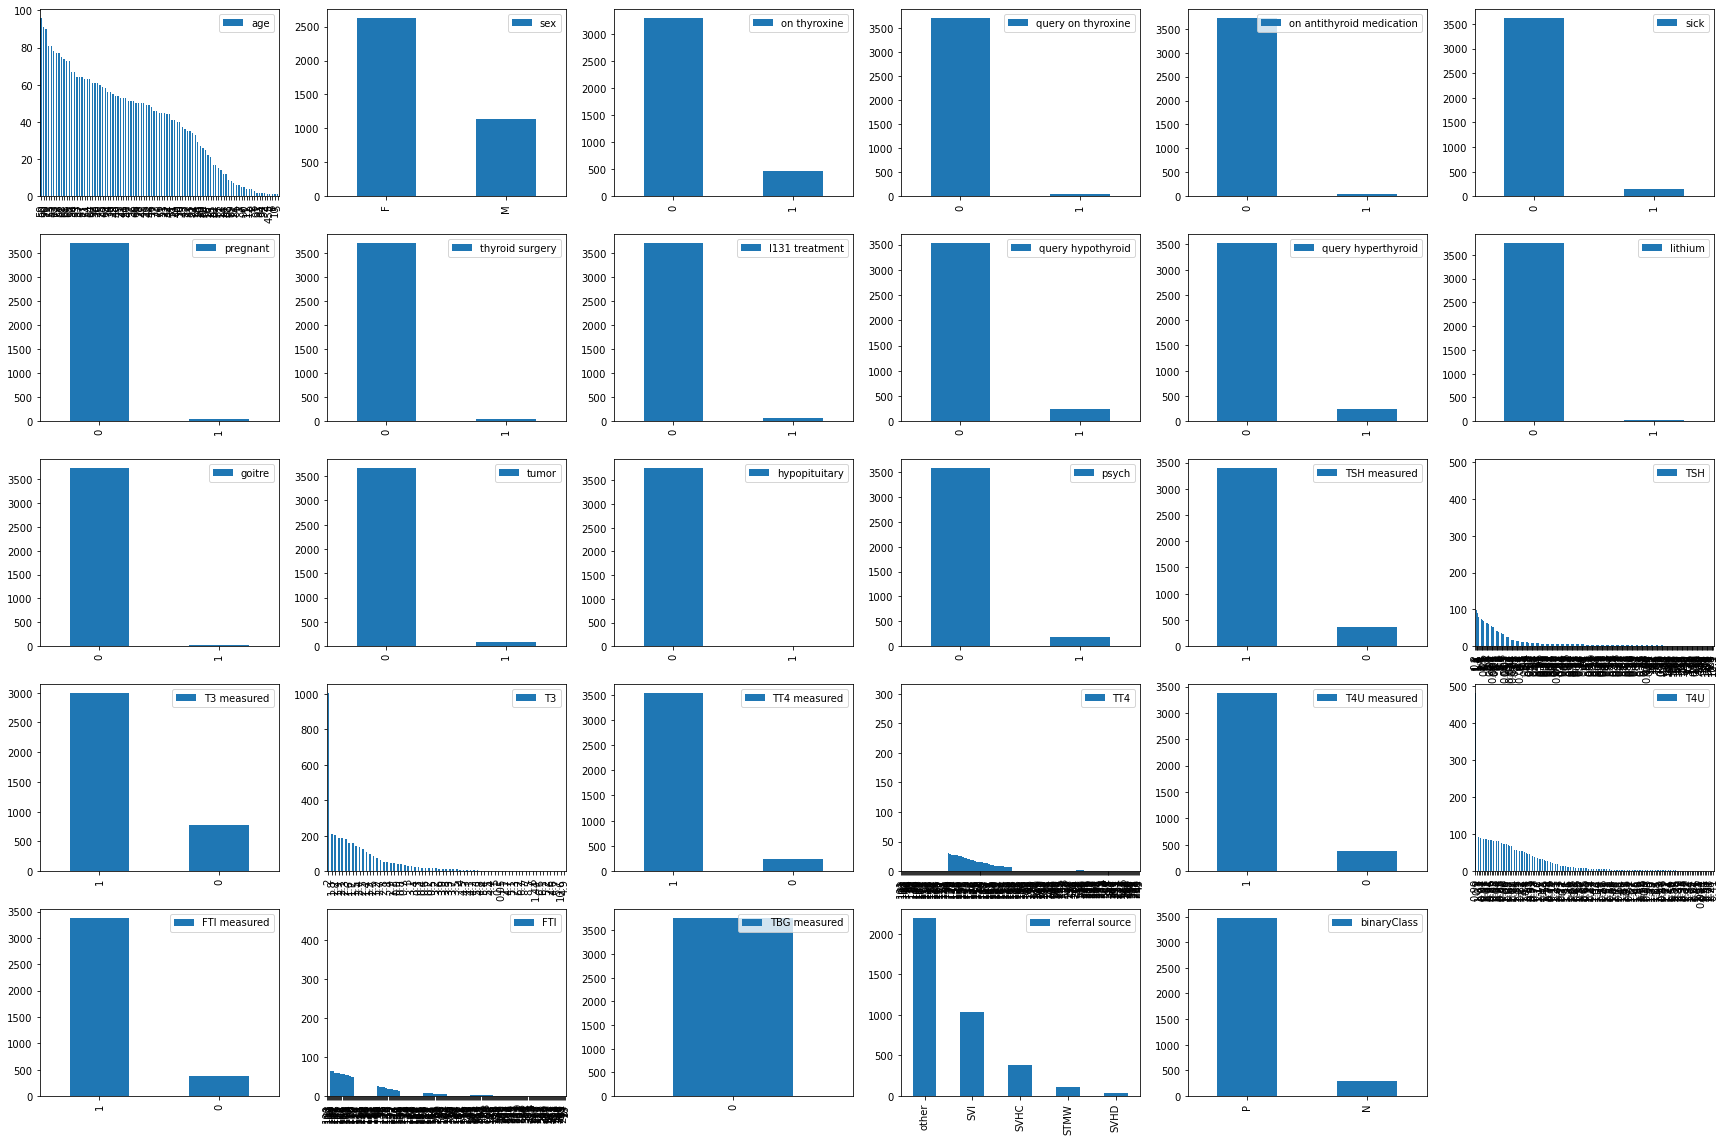

In [51]:

for i,var in enumerate(col):
    plt.subplot(5,6,i+1)
    data[var].value_counts().plot.bar(figsize=(30,20),legend=True)

In [42]:
#Encoding

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(data)
housing_cat_1hot

<3772x1118 sparse matrix of type '<class 'numpy.float64'>'
	with 109388 stored elements in Compressed Sparse Row format>

In [45]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,SVHC,P
1,23,F,0,0,0,0,0,0,0,0,...,2,1,102,0,0.99,0,100,0,other,P
2,46,M,0,0,0,0,0,0,0,0,...,2,1,109,1,0.91,1,120,0,other,P
3,70,F,1,0,0,0,0,0,0,0,...,1.9,1,175,0,0.99,0,100,0,other,P
4,70,F,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,SVI,P


In [46]:
print(housing_cat_1hot)

  (0, 34)	1.0
  (0, 93)	1.0
  (0, 95)	1.0
  (0, 97)	1.0
  (0, 99)	1.0
  (0, 101)	1.0
  (0, 103)	1.0
  (0, 105)	1.0
  (0, 107)	1.0
  (0, 109)	1.0
  (0, 111)	1.0
  (0, 113)	1.0
  (0, 115)	1.0
  (0, 117)	1.0
  (0, 119)	1.0
  (0, 121)	1.0
  (0, 124)	1.0
  (0, 235)	1.0
  (0, 413)	1.0
  (0, 441)	1.0
  (0, 484)	1.0
  (0, 513)	1.0
  (0, 727)	1.0
  (0, 800)	1.0
  (0, 875)	1.0
  :	:
  (3771, 99)	1.0
  (3771, 101)	1.0
  (3771, 103)	1.0
  (3771, 105)	1.0
  (3771, 107)	1.0
  (3771, 109)	1.0
  (3771, 111)	1.0
  (3771, 113)	1.0
  (3771, 115)	1.0
  (3771, 117)	1.0
  (3771, 119)	1.0
  (3771, 121)	1.0
  (3771, 124)	1.0
  (3771, 230)	1.0
  (3771, 413)	1.0
  (3771, 438)	1.0
  (3771, 484)	1.0
  (3771, 725)	1.0
  (3771, 727)	1.0
  (3771, 793)	1.0
  (3771, 875)	1.0
  (3771, 1102)	1.0
  (3771, 1110)	1.0
  (3771, 1115)	1.0
  (3771, 1117)	1.0


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder=LabelEncoder()

In [49]:
label_encoder.fit_transform(data)

ValueError: y should be a 1d array, got an array of shape (3772, 29) instead.